# Genetic Algorithm Assignment
30% of the overall grade for this module

Marks indciated in sections below are based on percentage of marks allocated for this module

In this assignment you must choose a problem, and attempt to use the Genetic Alogrithm that we developed in class to solve this problem.





## The Problem         **(~30%)**

*   Description of the problem





---

The problem adressed by this assignment is image generation. Is it possible to replicate an input image through the use of the genetic algorithm.

---



*   Discussion of the suitablity of Genetic Algorithms


---

I believe the genetic algorithm is quite suitable for image generation tasks. When broken down images are not a particularly complex data structure, being compirsed of a 2D array of rows and pixels within rows, each of which has three channels red, green, and blue. Mutation can be carried out on a channel by channel basis which allows for granulairty with optimising paramters such as mutation rate and range. 

---



*   Complexity of the problem  (Overall marks allocated based on ..)

# The problem and the cost function   **(~20%)**

In [1]:
#imports
import numpy as np
from PIL import Image, ImageDraw
from copy import deepcopy

def create_shape_image(width, height, shape):
    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    if shape == "circle":
        draw.ellipse([(25, 25), (75, 75)], fill="white", outline ="white")
    elif shape == "square":
        draw.rectangle([(25, 25), (75, 75)], fill="white", outline="white")
    elif shape == "triangle":
        draw.polygon([(50, 25), (25, 75), (75, 75)], fill="white", outline="white")

    return np.array(image)


In [159]:
target_image = Image.fromarray(create_shape_image(50, 50, "circle"))

test = create_shape_image(8, 8, "circle")
#test = create_random_image(2, 2)
target_image = Image.fromarray(test)
target_image.show()

In [2]:
file_path = './testimg3.png'

# Open the image file
with Image.open(file_path) as img:
    # Convert the image to a numpy array
    img_array = np.array(img)
    
test_image = Image.fromarray(img_array[:, :, :3])
test_image.show()
target_image = test_image

In [3]:
def cost_function(individual, target_image):
    #print the target_image as a numpy array
    #print(np.array(target_image))
    
    #print(individual)
    return np.mean((individual.astype(np.uint64) - np.array(target_image).astype(np.uint64)) ** 2)
    
def create_random_image(width, height):
    return np.random.randint(0, 255, (width, height, 3), dtype=np.uint8)

class problem:
    def __init__(self):
        self.width = 8
        self.height = 8
        self.number_of_genes = self.width * self.height
        self.cost_function = cost_function


In [39]:
ptest = problem()
ptest.width

10

# The Individual **(~30%)**


*   Chromosone
*   Crossover
*   Mutation



## Discussion and justification on the approaches taken for the above

---

Chromosome: 
I have chosen to use a 2D array of pixels as my chromosome, each pixel having red, green, and blue channels. For the sake of simplicity I am not including an alpha channel. My target chromosomes can be imported from image files, and I have written the create_random_image function to generate new chromosomes.

Crossover: 
I have chosen to use single point crossover for this assignment, my rationale being that if two parent chromosomes are of high value (having a low cost), using single point crossover will encourage improving trends in the colour of a pixel.

Mutation: 
For my mutation function I am iterating over each pixel in the image, and if a randomly generated number falls below the specified mutation rate, the red, green, and blue channels within that pixel are each mutated by adding or subtracting a random value from 0 to the specirfied mutation range.

---



In [4]:
# Code for individual class in here

def clamp(value, min_value, max_value):
    """Ensure 'value' falls within the range [min_value, max_value]."""
    return max(min_value, min(value, max_value))
class individual:
    chromosome = None
    cost = 9999999
    number_of_genes = None

    def __init__(self, prob):
        self.chromosome = create_random_image(prob.width, prob.height)
        self.number_of_genes = prob.number_of_genes
        self.cost = prob.cost_function(self.chromosome, target_image)
        
    def mutate(self, mutation_rate, mutation_range):
        for i in range(self.number_of_genes):
            if np.random.uniform() < mutation_rate:
                row_to_mutate = np.random.randint(0, len(self.chromosome))
                pixel_to_mutate = np.random.randint(0, len(self.chromosome[row_to_mutate]))
                pixel = self.chromosome[row_to_mutate][pixel_to_mutate]

                # Generate mutation for each color channel and clamp the values
                r_mutation = clamp(np.random.uniform(pixel[0] - mutation_range, pixel[0] + mutation_range), 0, 255)
                g_mutation = clamp(np.random.uniform(pixel[1] - mutation_range, pixel[1] + mutation_range), 0, 255)
                b_mutation = clamp(np.random.uniform(pixel[2] - mutation_range, pixel[2] + mutation_range), 0, 255)

                # Update the pixel values
                self.chromosome[row_to_mutate][pixel_to_mutate] = [r_mutation, g_mutation, b_mutation]
            
 
    def crossover(self,parent2):
       
        mid_point = len(self.chromosome) // 2
        # Create child images by swapping halves
        child1 = deepcopy(self)
        child1.chromosome[mid_point:] = parent2.chromosome[mid_point:]

        child2 = deepcopy(parent2)
        child2.chromosome[mid_point:] = self.chromosome[mid_point:]

        return child1, child2
        
        
    
                
            
              

## Running the algorithm  **(~10%)**

*   Parameter choices
*   Modifications (if any) to run_genetic
*   Rationale for the above



---

Parameters: Setting the population to 1000, and number of generations to 600 successfully generated an image that was clearly recognizeable as the target image. Gene mutate rate and ranges are intially set to 1 and 255 respectively, which will be changed dynamically as the number of generations processed grows.

Modifications: The main modification made to run_genetic was the dynamic altering of gene mutation rate and range. 

Rationale: During early generations I am encouring high levels of mutation in order to expose the cost function to a large number of different pixel combinations. As the number of generations processed grows I decrease both the mutation rate and range to allow for pixels trending in the right direction to be refined on a fine-grained level.


---



In [11]:
#  Parameter class here
class parameters:
  def __init__(self):
    self.population  = 1000
    self.number_of_generations = 600
    self.child_rate_per_generation = 1
    self.gene_mutate_rate = 1
    self.gene_mutate_range = 255

In [7]:
def choose_indices_from(number_in_list):
  index_1 = np.random.randint(number_in_list)
  index_2 = np.random.randint(number_in_list)
  if index_1 == index_2:
    return choose_indices_from(number_in_list)
  return index_1,index_2

def run_genetic(prob, params):
    cost_function = prob.cost_function
        
    number_in_population = params.population
    max_number_of_generations = params.number_of_generations
    number_of_children_per_generation = params.child_rate_per_generation * number_in_population
    gene_mutate_range = params.gene_mutate_range
    
    population = []
    
    best_solution = individual(prob)
    best_solution.cost = np.float64('inf')
    for i in range(number_in_population):
        new_individual = individual(prob)
        population.append(new_individual)

        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)

    gene_mutate_modifier = 1
    modified_gene_mutate_rate = 0.8
    
    for _iteration in range(max_number_of_generations):
        print(_iteration)
        
        if _iteration > max_number_of_generations * 0.6:
            modified_gene_mutate_rate = 0.3
            gene_mutate_range = 255 * 0.2
            print("Mutation rate set to 0.3")
        elif _iteration > max_number_of_generations * 0.45:
            modified_gene_mutate_rate = 0.5
            gene_mutate_range = 255 * 0.5
            print("Mutation rate set to 0.3")
    
            
        children = []
        debug_index = 0
        while len(children) < number_of_children_per_generation:
            
            #if debug_index % 250 == 0:
            #    print(str(debug_index))
                
            
                
            debug_index += 1
            parent1_index , parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]

            child1, child2 = parent1.crossover(parent2)
            child1.mutate(modified_gene_mutate_rate, gene_mutate_range)
            child1.cost = cost_function(child1.chromosome, target_image)
            child2.mutate(modified_gene_mutate_rate, gene_mutate_range)
            child2.cost = cost_function(child2.chromosome, target_image)

            # add children in list
            children.append(child1)
            children.append(child2)


        population += children

        population = sorted(population, key = lambda x:x.cost)

        population = population[:number_in_population]

        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        #plt.imshow(population[0].chromosome)
        #plt.title(f"Generation {_iteration}, Cost: {population[0].cost}")
        #plt.show()
        
        print("Best Solution for iteration " + str(_iteration) + " has cost of " + str (best_solution.cost) + " " + str(gene_mutate_range))
        

    return best_solution

In [12]:
params = parameters()

In [13]:
#  Running of the algorithm with outputs here
p1 = problem()
b1 = run_genetic(p1, params)

0
Best Solution for iteration 0 has cost of 18139.796875 255
1
Best Solution for iteration 1 has cost of 18139.796875 255
2
Best Solution for iteration 2 has cost of 18139.796875 255
3
Best Solution for iteration 3 has cost of 18139.796875 255
4
Best Solution for iteration 4 has cost of 18139.796875 255
5
Best Solution for iteration 5 has cost of 16898.145833333332 255
6
Best Solution for iteration 6 has cost of 16898.145833333332 255
7
Best Solution for iteration 7 has cost of 16898.145833333332 255
8
Best Solution for iteration 8 has cost of 16898.145833333332 255
9
Best Solution for iteration 9 has cost of 16898.145833333332 255
10
Best Solution for iteration 10 has cost of 16898.145833333332 255
11
Best Solution for iteration 11 has cost of 16898.145833333332 255
12
Best Solution for iteration 12 has cost of 16898.145833333332 255
13
Best Solution for iteration 13 has cost of 16898.145833333332 255
14
Best Solution for iteration 14 has cost of 16898.145833333332 255
15
Best Solutio

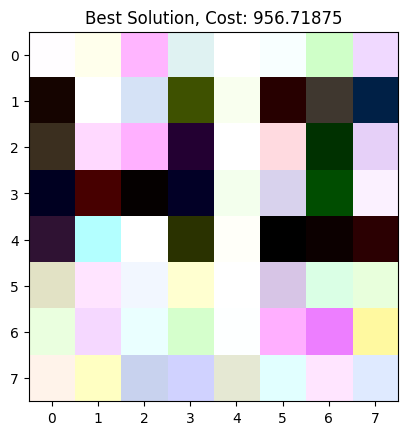

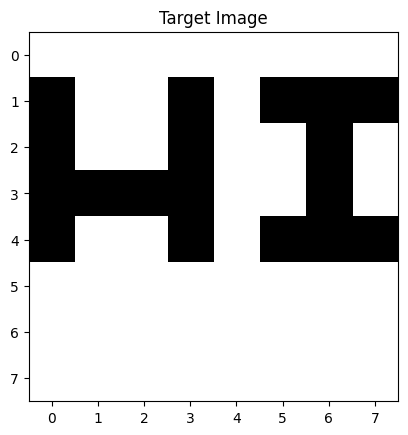

In [14]:
plt.imshow(b1.chromosome)
plt.title(f"Best Solution, Cost: {b1.cost}")
plt.show()


plt.imshow(target_image)
plt.title("Target Image")
plt.show()

In [ ]:
#  If changes to params or reruns of iterations dont overwrite, create more cells and copy code down to show evolution of final solution

## Results and conclusions    **(~10%)**

---

Results:

Conlusions:

---

